## 교차 검증

- 하이퍼 파라미터 튜닝
- 최적의 하이퍼 파라미터와 max_depth, min_samples_split
- 그때의 정확도
- 어떤 Feature가 중요한지 20개만 골라내시오

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_name_df = pd.read_csv('../00.data/UCI HAR Dataset/features.txt', sep = '\s+', header= None, names=['column_index', 'column_name'])
feature_name_df.head(3)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z


In [3]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df.head()

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1


In [4]:
feature_dup_df[feature_dup_df['column_index'] > 1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
feature_dup_df[feature_dup_df['column_index'] > 1].count()

column_index    42
dtype: int64

In [6]:
feature_cum_df = pd.DataFrame({'dup_cnt':feature_name_df.groupby('column_name').cumcount()})
feature_cum_df.reset_index(inplace=True)
feature_cum_df.head()

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [7]:
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [8]:
new_df = pd.merge(feature_name_df.reset_index(), feature_cum_df)
new_df.head()

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [9]:
new_df['column_name'] = new_df[['column_name', 'dup_cnt']].\
    apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
new_df.head()

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [10]:
new_df = new_df.drop(['index'], axis=1)
new_df.head()

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [11]:
# 해당 피처명이 몇번째 중복된 피처인지를 나타내기 위한 함수
def get_new_feature_name_df(old_df):
    dup_df = pd.DataFrame({'dup_cnt':feature_name_df.groupby('column_name').cumcount()})
    new_df = pd.merge(old_df.reset_index(), dup_df.reset_index())
    new_df['column_name'] = new_df[['column_name', 'dup_cnt']].\
        apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_df = new_df.drop(['index'], axis=1)
    return new_df

In [12]:
""" def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns= ['dup_cut'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df """

" def get_new_feature_name_df(old_feature_name_df):\n    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns= ['dup_cut'])\n    feature_dup_df = feature_dup_df.reset_index()\n    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)\n    return new_feature_name_df "

In [13]:
new_feature_df = get_new_feature_name_df(feature_name_df)
new_feature_df.head()

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [14]:
feature_list = list(new_feature_df.column_name.values)
feature_list[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [15]:
# 실질적으로 분석해야 하는 데이터들을 첫번째 함수에서 제작한 칼럼명을 가진 Data Frame으로 만들어 주는것
X_train = pd.read_csv('../00.data/UCI HAR Dataset/train/X_train.txt', 
                      header=None, sep='\s+', names=feature_list)
X_test = pd.read_csv('../00.data/UCI HAR Dataset/test/X_test.txt', 
                     header=None, sep='\s+', names=feature_list)
y_train = pd.read_csv('../00.data/UCI HAR Dataset/train/y_train.txt', 
                      header=None, sep='\s+', names=['action'])
y_test = pd.read_csv('../00.data/UCI HAR Dataset/test/y_test.txt', 
                     header=None, sep='\s+', names=['action'])

In [16]:
""" def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당
    feature_name_df = pd.read_csv('../00.data/UCI HAR Dataset/features.txt', sep= '\s+', header= None, names=['column_index', 'column_name'])
    #중복된 피처명을 수정하는 get_new_feature_names_df()를 이용, 신규 피처명 Data Frame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    # Data Frame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    #학습 피처 데이터세트와 테스트 피처 데이터를 Data Frame으로 로딩.칼럼명은 feature_name적용
    X_train = pd.read_csv('../00.data/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('../00.data/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)
    # 학습 테이블과 테스트 레이블 데이터를 Datae Frame 으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('../00.data/UCI HAR Dataset/train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv('../00.data/UCI HAR Dataset/test/y_test.txt', sep='\s+', names=['action'])

    #로드된 학습 /테스트용 Data Frame을 모두 변환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset() """

" def get_human_dataset():\n\n    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당\n    feature_name_df = pd.read_csv('../00.data/UCI HAR Dataset/features.txt', sep= '\\s+', header= None, names=['column_index', 'column_name'])\n    #중복된 피처명을 수정하는 get_new_feature_names_df()를 이용, 신규 피처명 Data Frame 생성\n    new_feature_name_df = get_new_feature_name_df(feature_name_df)\n    # Data Frame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환\n    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()\n    #학습 피처 데이터세트와 테스트 피처 데이터를 Data Frame으로 로딩.칼럼명은 feature_name적용\n    X_train = pd.read_csv('../00.data/UCI HAR Dataset/train/X_train.txt', sep='\\s+', names=feature_name)\n    X_test = pd.read_csv('../00.data/UCI HAR Dataset/test/X_test.txt', sep='\\s+', names=feature_name)\n    # 학습 테이블과 테스트 레이블 데이터를 Datae Frame 으로 로딩하고 칼럼명은 action으로 부여\n    y_train = pd.read_csv('../00.data/UCI HAR Dataset/train/y_train.txt', sep='\\s+', names=['action'])\n    y_test = pd.read_csv('../00.data/UCI HAR Dataset/test/y_t

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

### 결정 트리 (Decision Tree)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 반복시마다 동일한 예측 결과 도출 위해 random_state 설정
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)# 평가
accuracy_score(y_test, pred_dt)

0.8547675602307431

### GridSearchCV - 교차 검증, 최적 하이퍼 파라미터 튜닝을 한번에

하이퍼 파라미터 튜닝
최적의 하이퍼 파라미터와 max_depth, min_samples_split
그때의 정확도
어떤 Feature가 중요한지 20개만 골라내시오

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':[6, 8, 10, 12, 20, 24], 
    'min_samples_split':[6, 8, 10, 16, 18, 24]
}
grid_dtree = GridSearchCV(dtc, param_grid=parameters, cv=3, scoring='accuracy', refit=True)
grid_dtree.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCv 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 6, 'min_samples_split': 6}
GridSearchCv 최고 정확도: 0.8473


In [20]:
# GridSearchCV 객체의 cv_results_속성을 Data Frame으로 생성
cv_results_df =pd.DataFrame(grid_dtree.cv_results_)

# maex_depth 파라미터 값과 그때의 테스트 세트, 학습데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847251
1,6,0.847251
2,6,0.842763
3,6,0.842627
4,6,0.842491
5,6,0.842899
6,8,0.836915
7,8,0.844803
8,8,0.843307
9,8,0.845892


In [21]:
max_depth = [6, 8, 10, 12, 20, 24]
# max_depths값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    # 정확도
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'max_depth={depth}, 정확도:{accuracy:.4f}')

max_depth=6, 정확도:0.8558
max_depth=8, 정확도:0.8707
max_depth=10, 정확도:0.8673
max_depth=12, 정확도:0.8646
max_depth=20, 정확도:0.8548
max_depth=24, 정확도:0.8548


# 시각화

In [22]:
import seaborn as sns
import numpy as np
%matplotlib inline

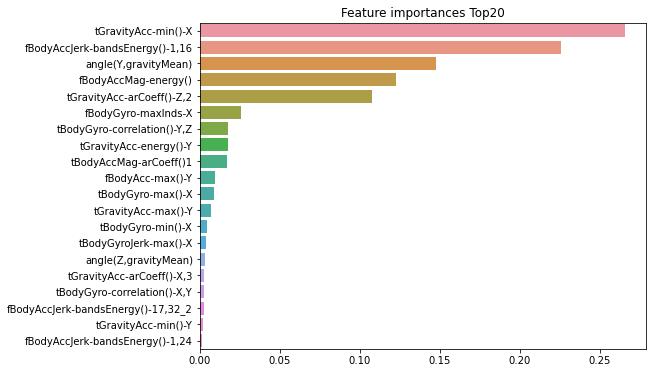

In [28]:
best_dt = grid_dtree.best_estimator_

ftr_im_v = best_dt.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seabom)의 막대 그래프로 쉽게 표현하기 위해 Series 변환
feature_importances =pd.Series(ftr_im_v, index = X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = feature_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()